Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import get_file
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

import matplotlib.pyplot as plt

Importing the data

In [ ]:
try:
    path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
    print("working")
except:
    print('Error downloading')
    raise

print(path)

2144903/2144903 [==============================] - 1s 0us/step
working
/root/.keras/datasets/kddcup.data_10_percent.gz


Data Exploration

In [ ]:
# exploring the data
df = pd.read_csv(path,header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.shape

(494021, 42)

In [ ]:
df.isna().sum()  #No none values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

### Data Preprocessing

In [ ]:
column_name = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
               'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
               'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
               'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
               'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
               'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
               'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
               'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
df.columns = column_name

In [ ]:
data_type = {'duration': float,
    'protocol_type': str,
    'service': str,
    'flag': str,
    'src_bytes': float,
    'dst_bytes': float,
    'land': str,
    'wrong_fragment': float,
    'urgent': float,
    'hot': float,
    'num_failed_logins': float,
    'logged_in': str,
    'num_compromised': float,
    'root_shell': float,
    'su_attempted': float,
    'num_root': float,
    'num_file_creations': float,
    'num_shells': float,
    'num_access_files': float,
    'num_outbound_cmds': float,
    'is_host_login': str,
    'is_guest_login': str,
    'count': float,
    'srv_count': float,
    'serror_rate': float,
    'srv_serror_rate': float,
    'rerror_rate': float,
    'srv_rerror_rate': float,
    'same_srv_rate': float,
    'diff_srv_rate': float,
    'srv_diff_host_rate': float,
    'dst_host_count': float,
    'dst_host_srv_count': float,
    'dst_host_same_srv_rate': float,
    'dst_host_diff_srv_rate': float,
    'dst_host_same_src_port_rate': float,
    'dst_host_srv_diff_host_rate': float,
    'dst_host_serror_rate': float,
    'dst_host_srv_serror_rate': float,
    'dst_host_rerror_rate': float,
    'dst_host_srv_rerror_rate': float}

df = df.astype(data_type)

In [ ]:
# convert the 23 classes to 5
df['target'] = df['target'].replace({
    'back.': 'dos',
    'buffer_overflow.': 'u2r',
    'ftp_write.': 'r2l',
    'guess_passwd.': 'r2l',
    'imap.': 'r2l',
    'ipsweep.': 'probe',
    'land.': 'dos',
    'loadmodule.': 'u2r',
    'multihop.': 'r2l',
    'neptune.': 'dos',
    'nmap.': 'probe',
    'perl.': 'u2r',
    'phf.': 'r2l',
    'pod.': 'dos',
    'portsweep.': 'probe',
    'rootkit.': 'u2r',
    'satan.': 'probe',
    'smurf.': 'dos',
    'spy.': 'r2l',
    'teardrop.': 'dos',
    'warezclient.': 'r2l',
    'warezmaster.': 'r2l',
    'normal.' : 'normal'
})

df['target'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.006433,0.000014,0.034519,0.000152,0.010212,0.000111,0.000036,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.134805,0.005510,0.782103,0.015520,1.798326,0.010551,0.007793,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,3.000000,3.000000,30.000000,5.000000,884.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# creating float variables index
lis = df.describe().loc['max'] > 1
float_indx = pd.DataFrame(lis[lis]).index.to_list()

In [ ]:
# create a standardizer
standardizer = MinMaxScaler()

# standardize float columns
df[float_indx] = standardizer.fit_transform(df[float_indx])

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,0.000823,4.363595e-06,0.000168,0.002144,0.000005,0.001151,0.000030,0.000012,0.000111,0.000018,...,0.911650,0.739865,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,0.012134,1.425228e-03,0.006409,0.044935,0.001837,0.026070,0.003104,0.002034,0.010551,0.003896,...,0.253903,0.415845,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.489989e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.180392,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.499542e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.488371e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

duration                       float64
protocol_type                   object
service                         object
flag                            object
src_bytes                      float64
dst_bytes                      float64
land                            object
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                       object
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                   object
is_guest_login                  object
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

In [ ]:
print(f"Protocol Type {df['protocol_type'].unique()}")
print(f"Service {df['service'].unique()}")
print(f"Flag {df['flag'].unique()}")
print(f"Land {df['land'].unique()}")
print(f"Logged In{df['logged_in'].unique()}")
print(f"Is Host Login {df['is_host_login'].unique()}")
print(f"is_guest_login : {df['is_guest_login'].unique()}")
print(f"Target : {df['target'].unique()}")



Protocol Type ['tcp' 'udp' 'icmp']
Service ['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
Flag ['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
Land ['0' '1']
Logged In['1' '0']
Is Host Login ['0']
is_guest_login : ['0' '1']
Target : ['normal' 'u2r' 'dos' 'r2l' 'probe']


In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'])

# Converting binary columns ('land', 'logged_in', 'is_host_login', 'is_guest_login') to integers
binary_columns = ['land', 'logged_in', 'is_host_login', 'is_guest_login']
df_encoded[binary_columns] = df_encoded[binary_columns].astype(int)

# Map target variable to numerical values
target_mapping = {'normal': 0, 'u2r': 1, 'dos': 2, 'r2l': 3, 'probe': 4}
df_encoded['target'] = df_encoded['target'].map(target_mapping)

print(df_encoded.head())

   duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0       0.0  2.610418e-07   0.001057     0             0.0     0.0  0.0   
1       0.0  3.446905e-07   0.000094     0             0.0     0.0  0.0   
2       0.0  3.389216e-07   0.000259     0             0.0     0.0  0.0   
3       0.0  3.158461e-07   0.000259     0             0.0     0.0  0.0   
4       0.0  3.129617e-07   0.000394     0             0.0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  ...  flag_REJ  flag_RSTO  \
0                0.0          1              0.0  ...         0          0   
1                0.0          1              0.0  ...         0          0   
2                0.0          1              0.0  ...         0          0   
3                0.0          1              0.0  ...         0          0   
4                0.0          1              0.0  ...         0          0   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0     

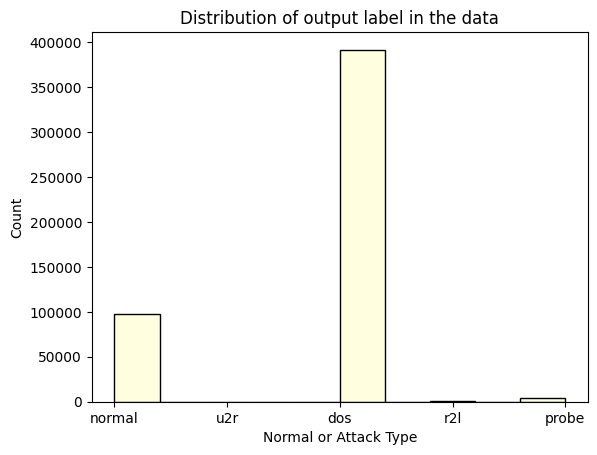

(array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object), array([391458,  97278,   4107,   1126,     52]))


In [ ]:
# visualize target variable
plt.hist(df['target'], edgecolor='black', color= 'lightyellow')

# Add labels and title
plt.xlabel('Normal or Attack Type')
plt.ylabel('Count')
plt.title('Distribution of output label in the data')

# Show the histogram
plt.show()
print(np.unique(df['target'], return_counts=True))

### Model Training and Evaluation

In [ ]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_train_pred = model.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_train_pred)

    start_time = time.time()
    y_test_pred = model.predict(X_test)
    testing_time = time.time() - start_time
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    # plotting confusion matrix
    cm = confusion_matrix(y_test,y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(model)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return {
        'model': model.__class__.__name__,
        'training_time': training_time,
        'testing_time': testing_time,
        'training_accuracy': training_accuracy,
        'testing_accuracy': testing_accuracy
    }

In [ ]:
from sklearn.svm import SVC

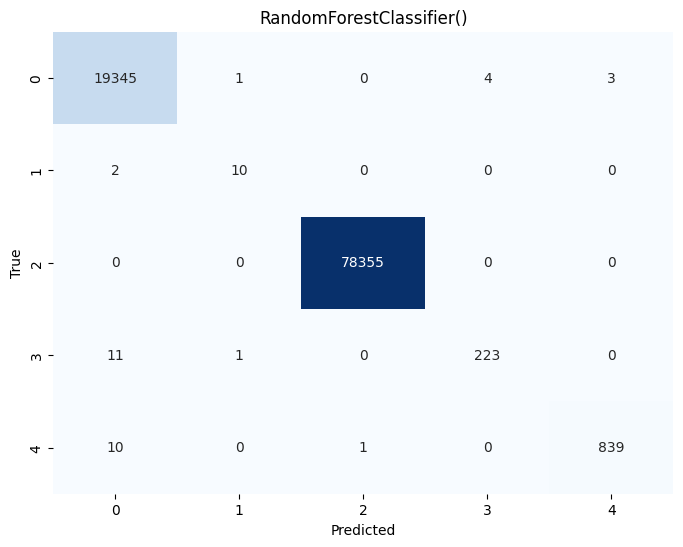

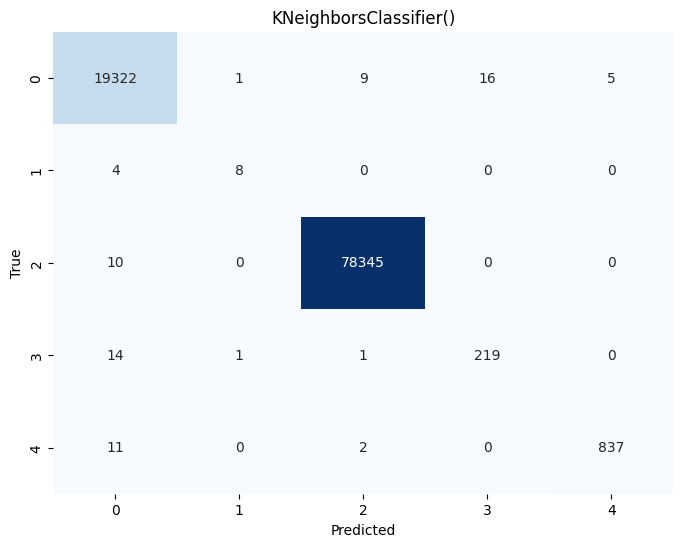

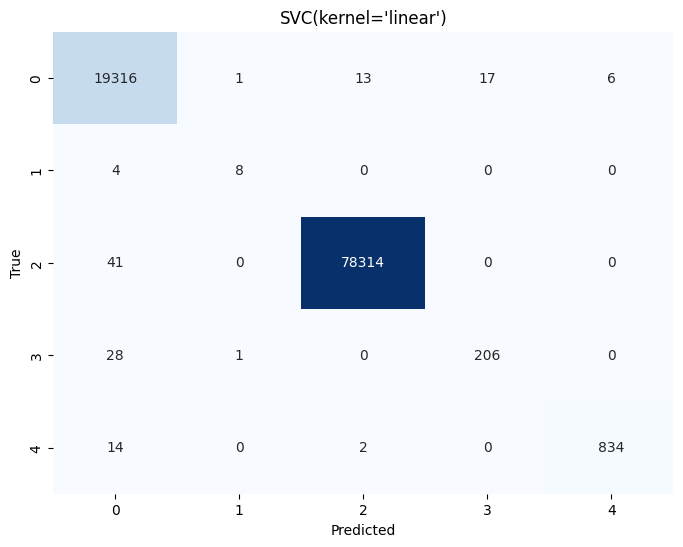

Model: RandomForestClassifier
Training Time: 42.3086 seconds
Testing Time: 1.5732 seconds
Training Accuracy: 1.0000
Testing Accuracy: 0.9997

Model: KNeighborsClassifier
Training Time: 0.6622 seconds
Testing Time: 433.4400 seconds
Training Accuracy: 0.9996
Testing Accuracy: 0.9993

Model: SVC
Training Time: 434.7137 seconds
Testing Time: 20.0405 seconds
Training Accuracy: 0.9990
Testing Accuracy: 0.9987



In [ ]:
# Trying different models
models_to_try = [
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel='linear', decision_function_shape='ovr')
]

results = []

for model in models_to_try:
    result = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results.append(result)

for result in results:
    print(f"Model: {result['model']}")
    print(f"Training Time: {result['training_time']:.4f} seconds")
    print(f"Testing Time: {result['testing_time']:.4f} seconds")
    print(f"Training Accuracy: {result['training_accuracy']:.4f}")
    print(f"Testing Accuracy: {result['testing_accuracy']:.4f}")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


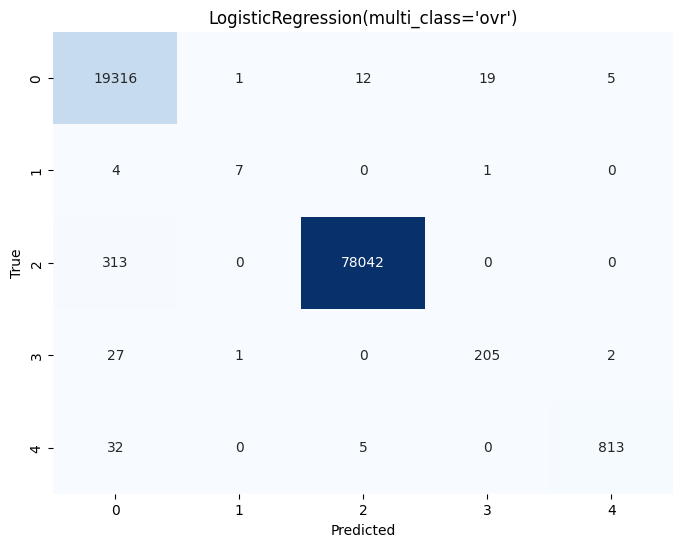

Model: RandomForestClassifier
Training Time: 42.3086 seconds
Testing Time: 1.5732 seconds
Training Accuracy: 1.0000
Testing Accuracy: 0.9997

Model: KNeighborsClassifier
Training Time: 0.6622 seconds
Testing Time: 433.4400 seconds
Training Accuracy: 0.9996
Testing Accuracy: 0.9993

Model: SVC
Training Time: 434.7137 seconds
Testing Time: 20.0405 seconds
Training Accuracy: 0.9990
Testing Accuracy: 0.9987

Model: LogisticRegression
Training Time: 72.7154 seconds
Testing Time: 0.1251 seconds
Training Accuracy: 0.9957
Testing Accuracy: 0.9957



In [ ]:
# training logistic reg model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(multi_class='ovr', solver='lbfgs')
logit_result = train_and_evaluate(logreg_model, X_train, y_train, X_test, y_test)
results.append(logit_result)

for result in results:
    print(f"Model: {result['model']}")
    print(f"Training Time: {result['training_time']:.4f} seconds")
    print(f"Testing Time: {result['testing_time']:.4f} seconds")
    print(f"Training Accuracy: {result['training_accuracy']:.4f}")
    print(f"Testing Accuracy: {result['testing_accuracy']:.4f}")
    print()

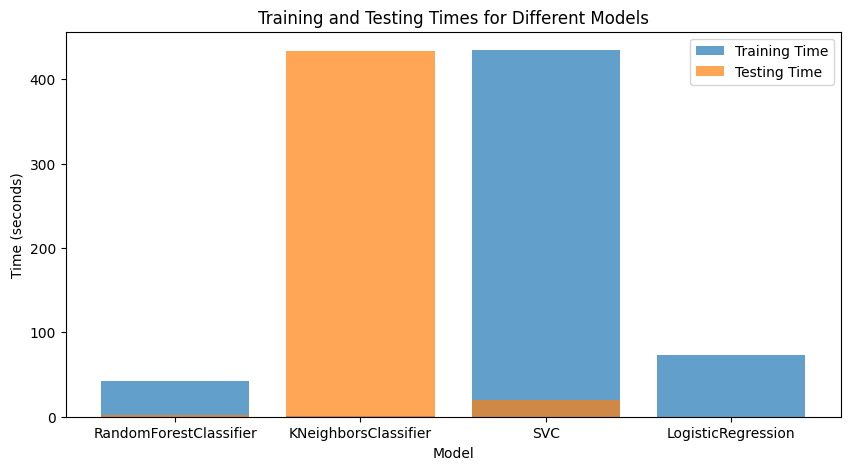

In [ ]:
models = [result['model'] for result in results]
training_times = [result['training_time'] for result in results]
testing_times = [result['testing_time'] for result in results]
training_accuracies = [result['training_accuracy'] for result in results]
testing_accuracies = [result['testing_accuracy'] for result in results]


plt.figure(figsize=(10, 5))
plt.bar(models, training_times, label='Training Time', alpha=0.7)
plt.bar(models, testing_times, label='Testing Time', alpha=0.7)
plt.title('Training and Testing Times for Different Models')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()


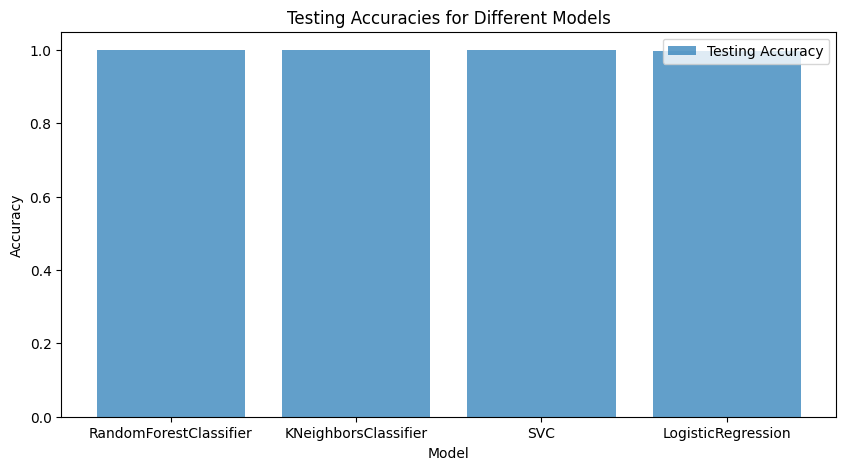

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(models, testing_accuracies, label='Testing Accuracy', alpha=0.7)
plt.title('Testing Accuracies for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()